# Exercise 9

In this Jupyter Notebook I want to find the shortest path for two set of 34 cities (travelling salesman problem). The first set are cities randomly disposed on a unitary circunference and the second is composed of cities randomly setted into a square.<br>
To find the best path I used a genetic algorithm that works on a population of 1156 ($34^2$) possible paths. Each generation the paths can do a crossover or mutate until all the population is changed. This can lead to the best path because shortest is the path, higher is its probability to do a crossover so generate a new good path.

In [2]:
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from scipy.optimize import curve_fit
from IPython.display import clear_output
from matplotlib import cm
from matplotlib.animation import FuncAnimation

## <span style="color:green"> Circle </span>

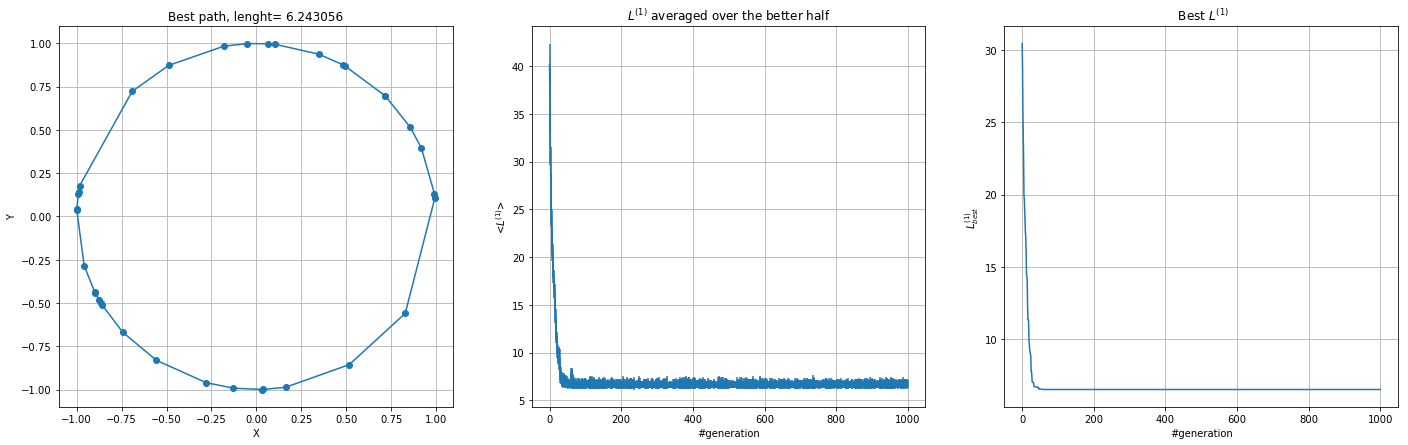

In [4]:
path_mean = "Circle/mean.out"
path = "Circle/output.out"
path_b = "Circle/best.out"

path_bests = np.array([
    "Paths_circle/best" + str(i) + ".out"
    for i in range(1,35)
])
    
x_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(1),unpack=True)
    for i in range(len(path_bests))
])

y_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(2),unpack=True)
    for i in range(len(path_bests))
])

step_c, mean_c, err = np.loadtxt(path_mean, usecols=(0,1,2), unpack=True)
label_c, x_c, y_c = np.loadtxt(path,usecols=(0,1,2), unpack=True)
best = np.loadtxt(path_b,usecols=(0), unpack=True)

lenght_c=0

for i in range(len(x_c)-1):
    lenght_c += np.sqrt((x_c[i]-x_c[i+1])**2 + (y_c[i]-y_c[i+1])**2)

fig, (path_plot, mean_plot, best_plot) = plt.subplots(1,3, figsize=(24,7))

path_plot.plot(x_c,y_c,marker="o")
path_plot.grid(True)
path_plot.set_xlabel("X")
path_plot.set_ylabel("Y")
path_plot.set_title("Best path, lenght= %f" %lenght_c)

mean_plot.errorbar(step_c,mean_c,yerr=err)
mean_plot.grid(True)
mean_plot.set_xlabel("#generation")
mean_plot.set_ylabel("<$L^{(1)}$>")
mean_plot.set_title("$L^{(1)}$ averaged over the better half")

best_plot.plot(best)
best_plot.grid(True)
best_plot.set_xlabel("#generation")
best_plot.set_ylabel("$L^{(1)}_{best}$")
best_plot.set_title(" Best $L^{(1)}$")

'''for i in range(len(x_bests)):
    path_plot.clear()
    path_plot.plot(x_bests[i],y_bests[i],marker="o")
    path_plot.grid(True)
    path_plot.set_xlabel("X")
    path_plot.set_ylabel("Y")
    path_plot.set_title("Best path, lenght= %f" %lenght_c)
    display(fig)
    clear_output(wait=True)'''

#ani = FuncAnimation(fig, animate, fargs=(path_plot, x_bests, y_bests, lenght_c),interval=500, repeat=True)

plt.show()


The fastest route for cities disposed on a circle is obviously the circunference, as the graph shows and, for the unitary circle, the lenght is $2 \pi$. <br>
The graph of the shortest path shows how fast the genetic algorithm converges to the best.

# <span style="color:green"> Square </span>

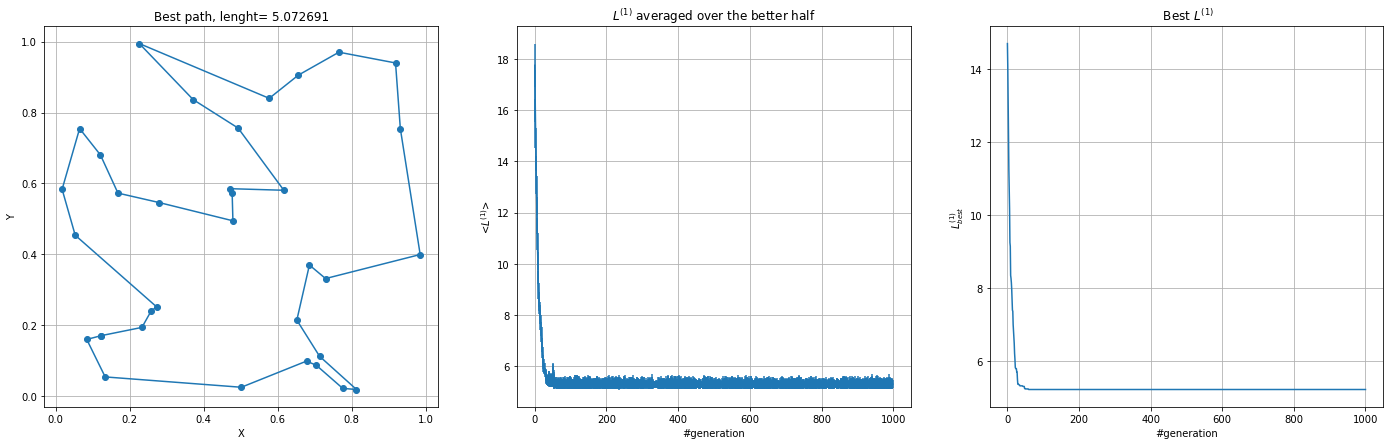

In [9]:
path_mean = "Square/mean.out"
path = "Square/output.out"
path_b = "Square/best.out"

path_bests = np.array([
    "Paths_square/best" + str(i) + ".out"
    for i in range(1,36)
])
    
x_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(1),unpack=True)
    for i in range(len(path_bests))
])

y_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(2),unpack=True)
    for i in range(len(path_bests))
])

step_s, mean_s, err_s = np.loadtxt(path_mean, usecols=(0,1,2), unpack=True)
label_s, x_s, y_s = np.loadtxt(path,usecols=(0,1,2), unpack=True)
best = np.loadtxt(path_b,usecols=(0), unpack=True)

lenght_s=0

for i in range(len(x_s)-1):
    lenght_s += np.sqrt((x_s[i]-x_s[i+1])**2 + (y_s[i]-y_s[i+1])**2)

fig, (path_plot, mean_plot, best_plot) = plt.subplots(1, 3, figsize=(24,7))

path_plot.plot(x_s,y_s,marker="o")
path_plot.grid(True)
path_plot.set_xlabel("X")
path_plot.set_ylabel("Y")
path_plot.set_title("Best path, lenght= %f" %lenght_s)

mean_plot.errorbar(step_s,mean_s,yerr=err_s)
mean_plot.grid(True)
mean_plot.set_xlabel("#generation")
mean_plot.set_ylabel("<$L^{(1)}$>")
mean_plot.set_title("$L^{(1)}$ averaged over the better half")

best_plot.plot(best)
best_plot.grid(True)
best_plot.set_xlabel("#generation")
best_plot.set_ylabel("$L^{(1)}_{best}$")
best_plot.set_title(" Best $L^{(1)}$")

#FuncAnimation(fig, animate, fargs=(path_plot, x_bests, y_bests, lenght_s),interval=500)

plt.show()


This case was less trivial than the previous one because I dont'n know exactly the shortest path and the geometry of the cities don't allow to reach a good path with a not optimized code. A code that arrive to the best circle path can lead to a path with intersection in the square. But once the code works correctly the best path converges rapidly to a possible minimun.